# Exploratory Data Analysis - PoC Data

This loads the class `DataHandler` which is a class that should be able to process data comming either from `PoC` or `CARMA`

In [1]:
from collector.handler import DataHandler

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In particular we consider one of the `CARMA` datasets

In [3]:
# csv path 
csvpath = 'data/raw/poc/cacc/data68.csv'
experiment = DataHandler(csvpath)

Detections with `windowSize=10`

In [4]:
experiment.compute_response_times(windowSize=10)

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data68


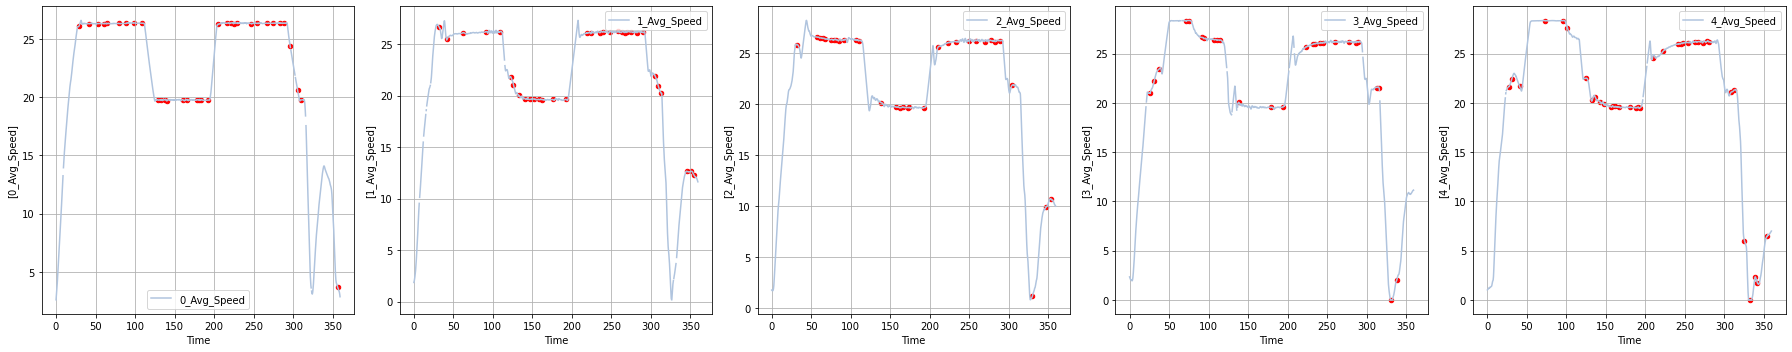

In [5]:
experiment.plot_speed_timedetections()

Detections with `windowSize=20`

In [6]:
experiment.compute_response_times(windowSize=20)

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data68


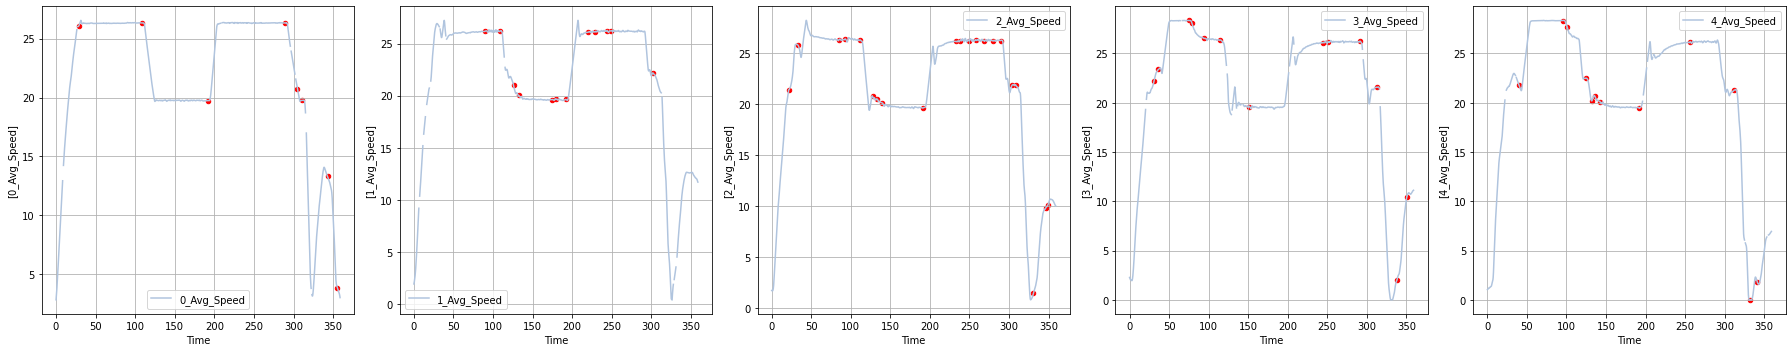

In [7]:
experiment.plot_speed_timedetections()

In [8]:
# Plot raw Speeds: 
# Note: To Analyze why is there some data holes in the processed data and nor in the original one? 
# plt.plot(experiment.data['elapsed_time (s)'], experiment.data['Speed - 0'])

After passing the path towards the file we execute the method `compute_response_times` which is responsible for loading, cleaning, and computing the corresponding times 

In [9]:
experiment._transitiontimes

,vehid,value
0,0,28.55
1,0,108.45
2,0,191.25
3,0,289.05
4,0,304.75
...,...,...
325,4,192.25
326,4,255.55
327,4,311.95
328,4,331.75


**As it can be seen there is one error in the computation with the PoC data, things to verify.** 
1. **Are the columns the right ones?** 
    * ok it has been changed : speed_CACC instead of global_yaw_PINPOINT and elapsed_time (s) instead of utc_bin_formatted
2. **is the data correctly imported/ cleaned?**
    * there are still some issues with the cleaning algorithm there are NaN values present at the end 
3. **is the algorithm properly working as expected?**
    * Not right now, detection of transition times are tied to the level of noise. Due to derivatives in some cases this cannot be avoided. 
    Solutions: 
        1. Use a wider window to process 
        2. Use `stabilization_window` in the past to filter out outliers

**Note**: This code should be usable after fixing the errors in the computation, it is left as raw before final review

In [10]:
# Time between vehicle i-1 and vehicle i
experiment._compute_leader_follower_times()

,1,2,3,4
0,0.00,NaN,NaN,NaN
1,NaN,4.30,NaN,NaN
2,NaN,NaN,-2.00,NaN
3,NaN,NaN,NaN,9.30
4,0.35,NaN,NaN,NaN
5,NaN,2.75,NaN,NaN
6,NaN,NaN,2.65,NaN
7,NaN,NaN,NaN,10.75
8,0.65,NaN,NaN,NaN
9,NaN,-0.15,NaN,NaN


In [11]:
# Time between vehicle 1 and vehicle i
experiment._compute_head_follower_times()

,1,2,3,4
0,0.00,NaN,NaN,NaN
1,NaN,4.30,NaN,NaN
2,NaN,NaN,2.30,NaN
3,NaN,NaN,NaN,11.6
4,0.35,NaN,NaN,NaN
5,NaN,3.10,NaN,NaN
6,NaN,NaN,5.75,NaN
7,NaN,NaN,NaN,16.5
8,0.65,NaN,NaN,NaN
9,NaN,0.50,NaN,NaN


## Explore the whole amount of files 

In this case we are going to process all data from `CARMA`

In [12]:
from glob import glob

filenames_acc = glob('data/raw/poc/acc/*.csv')
print(filenames_acc)

filenames_cacc = glob('data/raw/poc/cacc/*.csv')
print(filenames_cacc)

filenames_hybrid = glob('data/raw/poc/hybrid/*.csv')
print(filenames_hybrid)

['data/raw/poc/acc/data30.csv', 'data/raw/poc/acc/data28.csv', 'data/raw/poc/acc/data29.csv']
['data/raw/poc/cacc/data69.csv', 'data/raw/poc/cacc/data68.csv', 'data/raw/poc/cacc/data71.csv', 'data/raw/poc/cacc/data70.csv', 'data/raw/poc/cacc/data72.csv']
['data/raw/poc/hybrid/data50.csv', 'data/raw/poc/hybrid/data51.csv', 'data/raw/poc/hybrid/data53.csv', 'data/raw/poc/hybrid/data52.csv', 'data/raw/poc/hybrid/data49.csv']


In [13]:
experiments_acc = [DataHandler(file) for file in filenames_acc]
experiments_cacc = [DataHandler(file) for file in filenames_cacc]
experiments_hybrid = [DataHandler(file) for file in filenames_hybrid]

We can now compute the transition times, detection of response times in each vehicle

In [14]:
[e.compute_response_times(windowSize=20) for e in experiments_acc];
[e.compute_response_times(windowSize=20) for e in experiments_cacc];
[e.compute_response_times(windowSize=20) for e in experiments_hybrid];

Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data30
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data28
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data29
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data69
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data68
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data71
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data70
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data72
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Treating case: data50
Standarizing data
Cleaning data
Computing Statistics
Computing transition times
Tr

Let's compute the leader follower response times 

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

compute_leader_follower = lambda x: pd.concat([lf._compute_leader_follower_times() for lf in x])
compute_head_follower= lambda x: pd.concat([lf._compute_head_follower_times() for lf in x])

def summary_stats(rtdf):
    long_rtdf = pd.melt(rtdf,var_name = 'Platoon ID', value_name='Value')
    group = long_rtdf.groupby('Platoon ID')
    dfSummary = pd.concat([group.mean(),group.std(),group.count()],axis=1)
    dfSummary.columns = ['Mean TR($i$,$i-1$)', 'Std TR($i$,$i-1$)', 'Count TR($i$,$i-1$)']
    return dfSummary

rtlf_acc = compute_leader_follower(experiments_acc)
rtlf_cacc= compute_leader_follower(experiments_cacc)
rtlf_hybrid = compute_leader_follower(experiments_hybrid)

## Statistics & Results 

#### $i-1,i$ response time

This represents the response time between the leader `i-1` and the follower `i`

In [16]:
summary_ACC = summary_stats(rtlf_acc)
summary_CACC = summary_stats(rtlf_cacc)

total_summary = pd.concat([summary_ACC,summary_CACC],keys = ['ACC','CACC'],axis=1)
total_summary

ACC                                        \
           Mean TR($i$,$i-1$) Std TR($i$,$i-1$) Count TR($i$,$i-1$)   
Platoon ID                                                            
1                    3.471429          2.445039                   7   
2                    1.385714          4.418306                   7   
3                    2.628571          4.513947                   7   
4                    3.264286          1.451354                   7   

                         CACC                                        
           Mean TR($i$,$i-1$) Std TR($i$,$i-1$) Count TR($i$,$i-1$)  
Platoon ID                                                           
1                    2.171053          4.316580                  19  
2                    2.600000          7.205014                  19  
3                   -0.644737          7.770741                  19  
4                    7.797368          7.120441                  19

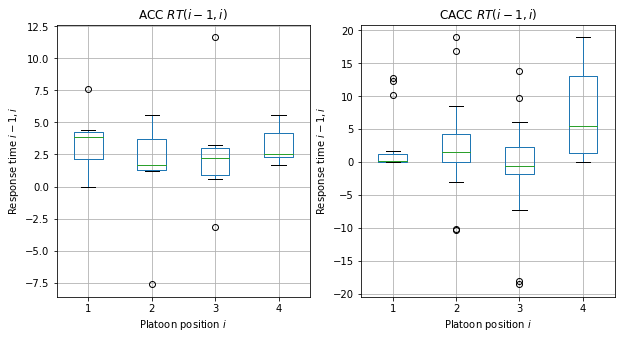

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
a = rtlf_acc.boxplot(ax=ax[0]);
b = rtlf_cacc.boxplot(ax=ax[1]);
# c = rtlf_hybrid.boxplot(ax=ax[2]); # We have problems here!

a.set_title('ACC $RT(i-1,i)$');b.set_title('CACC $RT(i-1,i)$');#c.set_title('Hybrid')
a.set_xlabel('Platoon position $i$');b.set_xlabel('Platoon position $i$');#c.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $i-1,i$');b.set_ylabel('Response time $i-1,i$');#c.set_ylabel('Response time $i-1,i$');

#### $0,i$ response time 

In [18]:
rt0f_acc = compute_head_follower(experiments_acc)
rt0f_cacc= compute_head_follower(experiments_cacc)
rt0f_hybrid = compute_head_follower(experiments_hybrid)

This represents the time between vehicle `0` and vehicle `i`

In [19]:
summary_ACC = summary_stats(rt0f_acc)
summary_CACC = summary_stats(rt0f_cacc)

total_summary = pd.concat([summary_ACC,summary_CACC],keys = ['ACC','CACC'],axis=1)
total_summary

ACC                                        \
           Mean TR($i$,$i-1$) Std TR($i$,$i-1$) Count TR($i$,$i-1$)   
Platoon ID                                                            
1                    3.471429          2.445039                   7   
2                    4.857143          2.910674                   7   
3                    7.485714          4.194114                   7   
4                   10.750000          3.596989                   7   

                         CACC                                        
           Mean TR($i$,$i-1$) Std TR($i$,$i-1$) Count TR($i$,$i-1$)  
Platoon ID                                                           
1                    2.171053          4.316580                  19  
2                    4.771053          5.644228                  19  
3                    4.126316          5.075523                  19  
4                   11.923684          8.415006                  19

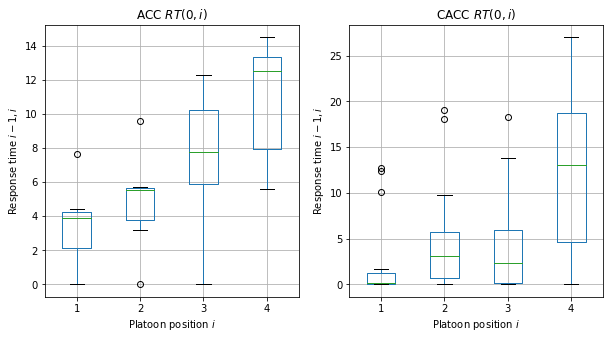

In [20]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
a = rt0f_acc.boxplot(ax=ax[0]);
b = rt0f_cacc.boxplot(ax=ax[1]);
# c = rt0f_hybrid.boxplot(ax=ax[2]); # We have problems here!

a.set_title('ACC $RT(0,i)$');b.set_title('CACC $RT(0,i)$');#c.set_title('Hybrid')
a.set_xlabel('Platoon position $i$');b.set_xlabel('Platoon position $i$');#c.set_xlabel('Platoon position $i$');
a.set_ylabel('Response time $i-1,i$');b.set_ylabel('Response time $i-1,i$');#c.set_ylabel('Response time $i-1,i$');

A. Ladino